<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_5_01_DecisionTreesSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Decision Trees**

In [ ]:
# predict_proba

# sklearn is using predict_proba gives the probability
# that a certain data point belongs to a certain class

# mymodel.predict_proba(X_new) >= 0.5 ---> x_new belongs to Class 1
# mymodel.predict_proba(X_new) < 0.5 ---> X_new belongs to Class 2

# Logistic Regression: predict_proba = 1/(1+exp(-W.T*X))
# W.T*X ---> decision function value

# predict_proba for decision tree is:
# take any node
# in this node, we have 10 red, 9 blue data points
# 10/19 is the probability that a data point belongs to red class
# 9/19 is the probability that a data point belongs to blue class

# entropy for that node = - (10/19)*log(10/19) +  -(9/19)*log(9/19)

# assume we have 19 red out of 19 data points in a node
# -19/19*log(19/19) + 0/19*log(0/19) = 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

### Step 1: Load the Cancer dataset
- Use `from sklearn.datasets import load_breast_cancer`
- Split data into train and test sets, utilize `data` and `target` from the downloaded cancer dataset

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [11]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
X,y = cancer.data, cancer.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0 )

### Step 2: Fitting the Tree Model
- Create a tree model with `max_depth=2`. Use `from sklearn.tree import DecisionTreeClassifier`
- Plot the tree with feature names. Use `from sklearn.tree import plot_tree`

In [15]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
X_train.shape

(426, 30)

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(max_depth=2)
tree1.fit(X_train, y_train)

#tree2 = DecisionTreeClassifier(max_depth=5)


DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.5, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.75, 0.5, 'worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.03\nsamples = 130\nvalue = [128, 2]')]

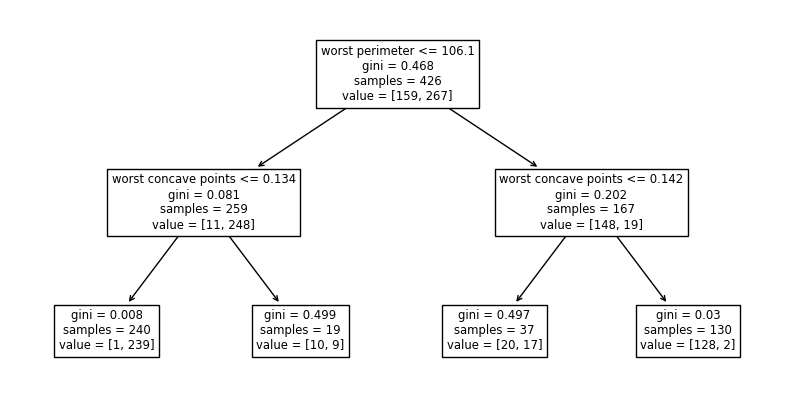

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(tree1, feature_names=cancer.feature_names)

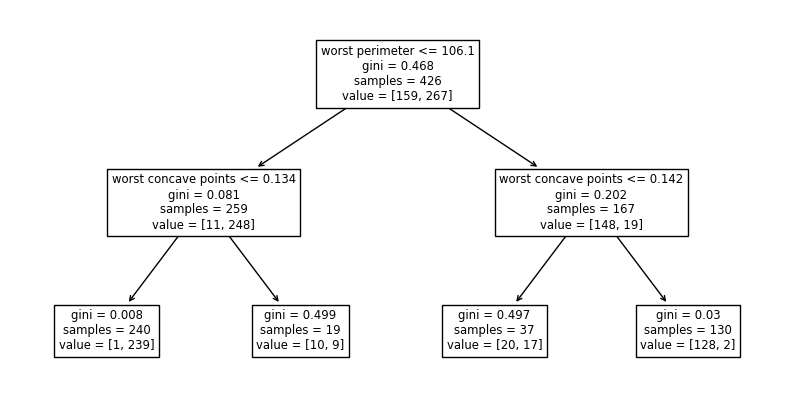

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(tree1, feature_names=cancer.feature_names); # ';' for only plot tree chart

### Step 3: Parameter Tuning
- Create a grtid search for `max_depth`. Use integer values from 1 to 6.
- Plot the mean train and test scores versus the maximum depth


### Step 4: Parameter Tuning
- Create a grtid search for `max_leaf_nodes`. Use integer values from 2 to 19.
- Plot the mean train and test scores versus the maximum depth


### Step 5: Extrapolation
- Read the dataset `ram_prices.csv`
- Plot the price versus year. Use logarithmic scale for the price.
- Create train and test datasets by splitting the data as train data being data before year 2000 and test data being data after year 2000
- Use price as the target variable. Take logarithm of the price.
- Train a tree and linear regression model
- Plot the train and test datasets as well as the predictions for the train dataset
- Plot the train and test datasets as well as the predictions for the the entire dataset


### Step 6: Feature Importance
- Load Iris dataset using `from sklearn.datasets import load_iris`
- Train a DT with `max_leaf_nodes=6`
- Plot the decision tree 
- Print the feature importance using `tree.feature_importances_`
- Create a bar graph for feature importance